<a href="https://colab.research.google.com/github/vikoms/Cluster-Assignment/blob/main/football_transfers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import library yang kita perlukan untuk langkah pertama
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Loading dataset ke dalam pandas DataFrame
# Pastikan nama file sesuai dengan file yang Anda upload
df = pd.read_csv('Top250Footballtransfers20002018.csv')

# Langkah pertama: lihat bentuk dasar dataset kita
print("Bentuk dataset (rows, columns):", df.shape)
print("\n" + "="*50)
print("Lima baris pertama dari dataset:")
print(df.head())

Bentuk dataset (rows, columns): (4700, 10)

Lima baris pertama dari dataset:
                Name        Position  Age     Team_from     League_from  \
0          Luís Figo    Right Winger   27  FC Barcelona          LaLiga   
1      Hernán Crespo  Centre-Forward   25         Parma         Serie A   
2      Marc Overmars     Left Winger   27       Arsenal  Premier League   
3  Gabriel Batistuta  Centre-Forward   31    Fiorentina         Serie A   
4     Nicolas Anelka  Centre-Forward   21   Real Madrid          LaLiga   

        Team_to League_to     Season  Market_value  Transfer_fee  
0   Real Madrid    LaLiga  2000-2001           NaN      60000000  
1         Lazio   Serie A  2000-2001           NaN      56810000  
2  FC Barcelona    LaLiga  2000-2001           NaN      40000000  
3       AS Roma   Serie A  2000-2001           NaN      36150000  
4      Paris SG   Ligue 1  2000-2001           NaN      34500000  


In [10]:
# Mendapatkan informasi detail tentang setiap kolom
print("Informasi detail tentang dataset:")
print(df.info())
print("\n" + "="*50)

# Melihat statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
print(df.describe())

Informasi detail tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB
None

Statistik deskriptif untuk kolom numerik:
               Age  Market_value  Transfer_fee
count  4700.000000  3.440000e+03  4.700000e+03
mean     24.338723  8.622469e+06  9.447586e+06
std       3.230809  8.795181e+06  1.043772e+07
min       0.000000  5.000000e+04  8.250000e

In [11]:
# Menganalisis distribusi posisi pemain
print("Distribusi Posisi Pemain:")
print(df['Position'].value_counts())
print(f"\nJumlah posisi unik: {df['Position'].nunique()}")

print("\n" + "="*60)

# Menganalisis distribusi league asal dan tujuan
print("Top 10 League Asal (League_from):")
print(df['League_from'].value_counts().head(10))

print("\nTop 10 League Tujuan (League_to):")
print(df['League_to'].value_counts().head(10))

Distribusi Posisi Pemain:
Position
Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Sweeper                  1
Defender                 1
Midfielder               1
Name: count, dtype: int64

Jumlah posisi unik: 17

Top 10 League Asal (League_from):
League_from
Premier League    608
Serie A           602
Ligue 1           428
LaLiga            418
1.Bundesliga      265
Série A           199
Championship      197
Eredivisie        190
Liga NOS          178
Premier Liga      169
Name: count, dtype: int64

Top 10 League Tujuan (League_to):
League_to
Premier League    1256
Serie A            739
LaLiga             525
1.Bundesliga       422
Ligue 1            397
Pre

In [12]:
# Menganalisis pola missing values dalam Market_value
print("Analisis Missing Values dalam Market_value:")
print(f"Total missing values: {df['Market_value'].isnull().sum()}")
print(f"Persentase missing: {(df['Market_value'].isnull().sum() / len(df)) * 100:.2f}%")

print("\n" + "="*50)

# Melihat apakah missing values terkait dengan season tertentu
print("Missing Market_value berdasarkan Season:")
missing_by_season = df[df['Market_value'].isnull()]['Season'].value_counts().sort_index()
print(missing_by_season)

print("\nTotal non-missing Market_value berdasarkan Season:")
non_missing_by_season = df[df['Market_value'].notnull()]['Season'].value_counts().sort_index()
print(non_missing_by_season)

Analisis Missing Values dalam Market_value:
Total missing values: 1260
Persentase missing: 26.81%

Missing Market_value berdasarkan Season:
Season
2000-2001    248
2001-2002    250
2002-2003    244
2003-2004    242
2004-2005    189
2005-2006     28
2006-2007     20
2007-2008     13
2008-2009      7
2009-2010      2
2010-2011      4
2011-2012      1
2012-2013      2
2013-2014      2
2014-2015      1
2016-2017      1
2017-2018      3
2018-2019      3
Name: count, dtype: int64

Total non-missing Market_value berdasarkan Season:
Season
2004-2005     59
2005-2006    219
2006-2007    229
2007-2008    235
2008-2009    243
2009-2010    247
2010-2011    241
2011-2012    248
2012-2013    246
2013-2014    248
2014-2015    245
2015-2016    248
2016-2017    249
2017-2018    241
2018-2019    242
Name: count, dtype: int64


In [13]:
# Prepare data for Hopkins test - using complete cases only
complete_data = df.dropna(subset=['Market_value'])
numerical_features = complete_data[['Age', 'Market_value', 'Transfer_fee']].copy()

# Remove any potential outliers (Age = 0)
numerical_features = numerical_features[numerical_features['Age'] > 0]

print(f"Data untuk Hopkins test: {numerical_features.shape[0]} baris")
print("\nContoh data yang akan ditest:")
print(numerical_features.head())

Data untuk Hopkins test: 3440 baris

Contoh data yang akan ditest:
      Age  Market_value  Transfer_fee
999    20    15000000.0      15000000
1001   18    13000000.0      14000000
1004   27     5000000.0      12000000
1009   25     8500000.0      11300000
1011   25    15000000.0      10700000


In [14]:
# Fungsi Hopkins Statistic
def hopkins_statistic(data, sample_size=None):
    if sample_size is None:
        sample_size = min(int(len(data) * 0.1), 500)  # 10% dari data atau maksimal 500

    # Standardisasi data terlebih dahulu
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Hitung jarak ke tetangga terdekat untuk sampel acak
    nbrs = NearestNeighbors(n_neighbors=2).fit(data_scaled)

    # Sampel acak dari data asli
    rand_indices = np.random.choice(len(data_scaled), sample_size, replace=False)
    real_points = data_scaled[rand_indices]

    # Buat titik-titik acak dalam ruang yang sama
    min_vals = np.min(data_scaled, axis=0)
    max_vals = np.max(data_scaled, axis=0)
    synthetic_points = np.random.uniform(min_vals, max_vals, (sample_size, data_scaled.shape[1]))

    # Hitung jarak ke tetangga terdekat
    distances_real, _ = nbrs.kneighbors(real_points, n_neighbors=2)
    distances_synthetic, _ = nbrs.kneighbors(synthetic_points, n_neighbors=1)

    # Hopkins Statistic
    u_distances = distances_real[:, 1]  # jarak ke tetangga kedua (bukan diri sendiri)
    w_distances = distances_synthetic[:, 0]

    H = np.sum(w_distances) / (np.sum(u_distances) + np.sum(w_distances))

    return H

# Hitung Hopkins Statistic
np.random.seed(42)  # untuk hasil yang konsisten
hopkins_score = hopkins_statistic(numerical_features)

print(f"Hopkins Statistic: {hopkins_score:.4f}")
print("\nInterpretasi:")
if hopkins_score < 0.3:
    print("- Nilai < 0.3: Data memiliki struktur clustering yang SANGAT BAIK")
elif hopkins_score < 0.4:
    print("- Nilai < 0.4: Data memiliki struktur clustering yang BAIK")
elif hopkins_score > 0.7:
    print("- Nilai > 0.7: Data memiliki struktur clustering yang SANGAT BAIK")
elif hopkins_score > 0.6:
    print("- Nilai > 0.6: Data memiliki struktur clustering yang BAIK")
else:
    print("- Nilai ≈ 0.5: Data cenderung ACAK, clustering mungkin tidak efektif")

Hopkins Statistic: 0.9782

Interpretasi:
- Nilai > 0.7: Data memiliki struktur clustering yang SANGAT BAIK


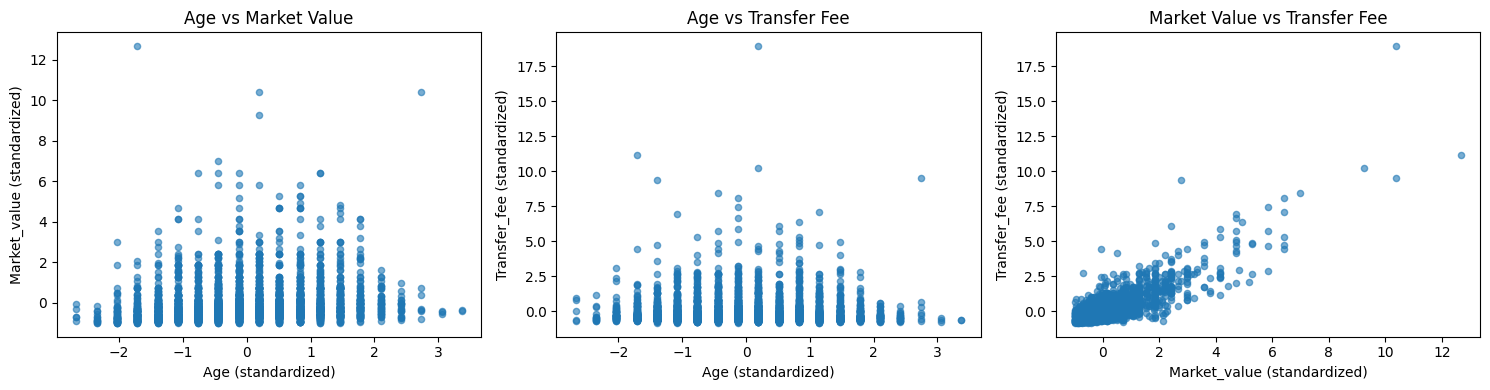

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Plot 2D untuk melihat struktur clustering
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age vs Market_value
axes[0].scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.6, s=20)
axes[0].set_xlabel('Age (standardized)')
axes[0].set_ylabel('Market_value (standardized)')
axes[0].set_title('Age vs Market Value')

# Age vs Transfer_fee
axes[1].scatter(data_scaled[:, 0], data_scaled[:, 2], alpha=0.6, s=20)
axes[1].set_xlabel('Age (standardized)')
axes[1].set_ylabel('Transfer_fee (standardized)')
axes[1].set_title('Age vs Transfer Fee')

# Market_value vs Transfer_fee
axes[2].scatter(data_scaled[:, 1], data_scaled[:, 2], alpha=0.6, s=20)
axes[2].set_xlabel('Market_value (standardized)')
axes[2].set_ylabel('Transfer_fee (standardized)')
axes[2].set_title('Market Value vs Transfer Fee')

plt.tight_layout()
plt.show()

In [16]:
# 1. Gunakan data lengkap (tanpa missing values)
clean_data = df.dropna(subset=['Market_value']).copy()
clean_data = clean_data[clean_data['Age'] > 0]  # hapus Age = 0

print(f"Data bersih: {clean_data.shape[0]} baris")

# 2. Siapkan features untuk clustering
numerical_cols = ['Age', 'Market_value', 'Transfer_fee']
X_numerical = clean_data[numerical_cols].copy()

# 3. Standardisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

print("Data siap untuk clustering!")
print(f"Shape data: {X_scaled.shape}")
print(f"Mean setelah scaling: {X_scaled.mean(axis=0)}")
print(f"Std setelah scaling: {X_scaled.std(axis=0)}")

Data bersih: 3440 baris
Data siap untuk clustering!
Shape data: (3440, 3)
Mean setelah scaling: [-3.66631790e-16 -1.65242497e-17 -8.26212483e-17]
Std setelah scaling: [1. 1. 1.]


Menghitung WCSS untuk setiap k...
k=1: WCSS = 10320.00
k=2: WCSS = 6666.90
k=3: WCSS = 4476.02
k=4: WCSS = 3423.50
k=5: WCSS = 2879.56
k=6: WCSS = 2460.79
k=7: WCSS = 2193.33
k=8: WCSS = 1946.15
k=9: WCSS = 1761.14
k=10: WCSS = 1639.04
k=11: WCSS = 1513.71
k=12: WCSS = 1435.28
k=13: WCSS = 1355.50
k=14: WCSS = 1300.24
k=15: WCSS = 1237.29


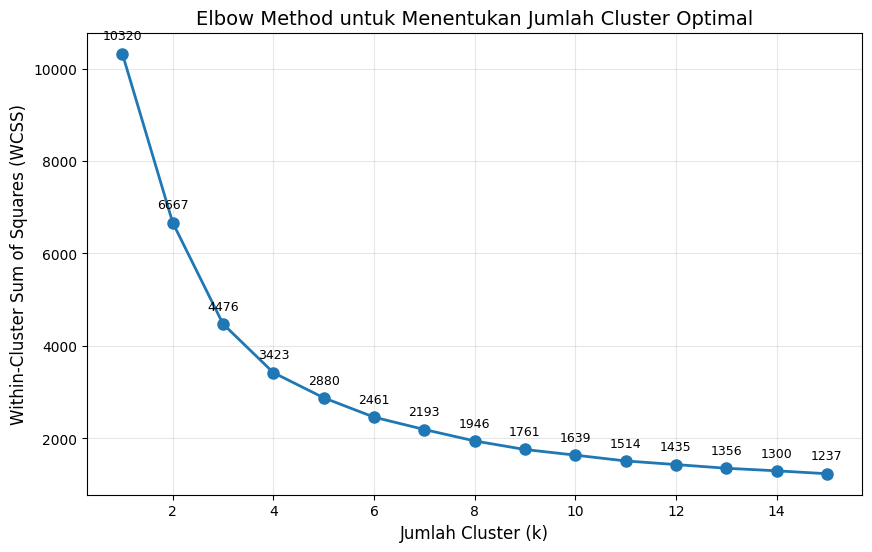


WCSS values: [10320.000000000013, 6666.902537877284, 4476.020268117222, 3423.496918568437, 2879.55569287213, 2460.7922404163983, 2193.332063524658, 1946.1527099804712, 1761.1426969065596, 1639.0368943516894, 1513.7121473657205, 1435.282959181359, 1355.5021028000708, 1300.2445328808803, 1237.2899246076606]


In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Hitung WCSS untuk berbagai jumlah cluster (k = 1 sampai 15)
wcss = []
k_range = range(1, 16)

print("Menghitung WCSS untuk setiap k...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ adalah WCSS
    print(f"k={k}: WCSS = {kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal', fontsize=14)
plt.xlabel('Jumlah Cluster (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)

# Menandai titik-titik penting
for i, (k, score) in enumerate(zip(k_range, wcss)):
    plt.annotate(f'{score:.0f}', (k, score), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

plt.show()

print(f"\nWCSS values: {wcss}")

Menghitung Silhouette Score untuk setiap k...
k=2: Silhouette Score = 0.5828
k=3: Silhouette Score = 0.3816
k=4: Silhouette Score = 0.3964
k=5: Silhouette Score = 0.3261
k=6: Silhouette Score = 0.3356
k=7: Silhouette Score = 0.3367
k=8: Silhouette Score = 0.3418
k=9: Silhouette Score = 0.3048
k=10: Silhouette Score = 0.3035


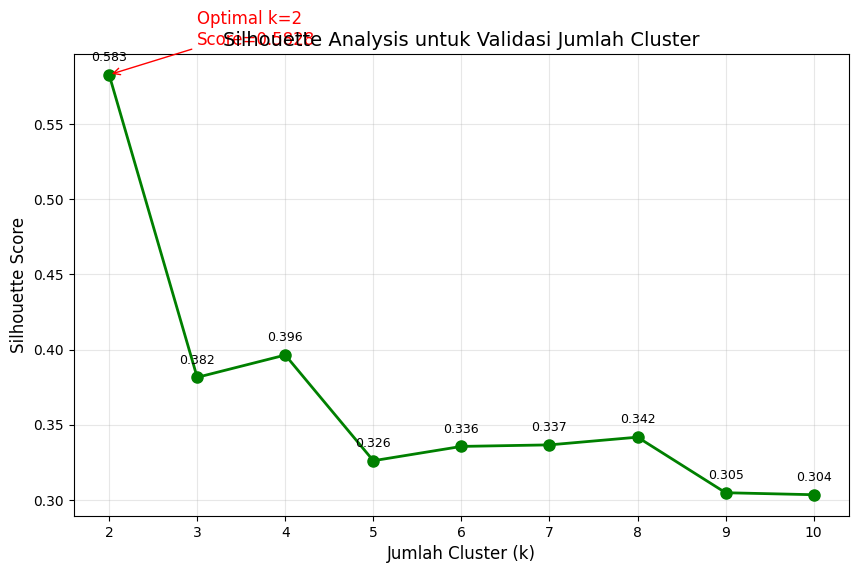


Silhouette scores: [np.float64(0.5827563858467737), np.float64(0.38155234644972347), np.float64(0.39638271208252), np.float64(0.3261176477385891), np.float64(0.33562906861544617), np.float64(0.33665760616948875), np.float64(0.34177566216708044), np.float64(0.30483864402390737), np.float64(0.3035128614402702)]
K optimal berdasarkan silhouette: 2


In [18]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Hitung silhouette score untuk k=2 sampai k=10
silhouette_scores = []
k_range_silhouette = range(2, 11)

print("Menghitung Silhouette Score untuk setiap k...")
for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.title('Silhouette Analysis untuk Validasi Jumlah Cluster', fontsize=14)
plt.xlabel('Jumlah Cluster (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)

# Menandai nilai tertinggi
max_score = max(silhouette_scores)
best_k = k_range_silhouette[silhouette_scores.index(max_score)]
plt.annotate(f'Optimal k={best_k}\nScore={max_score:.4f}',
             xy=(best_k, max_score), xytext=(best_k+1, max_score+0.02),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')

for k, score in zip(k_range_silhouette, silhouette_scores):
    plt.annotate(f'{score:.3f}', (k, score), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

plt.show()

print(f"\nSilhouette scores: {silhouette_scores}")
print(f"K optimal berdasarkan silhouette: {best_k}")

In [19]:
# Implementasi K-means dengan k=2
from sklearn.cluster import KMeans

# Melakukan clustering dengan k=2
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Menambahkan hasil cluster ke dataset asli
clean_data_copy = clean_data.copy()
clean_data_copy['Cluster'] = cluster_labels

# Analisis karakteristik setiap cluster
print("=== ANALISIS KARAKTERISTIK CLUSTER ===")
for cluster_id in range(2):
    cluster_data = clean_data_copy[clean_data_copy['Cluster'] == cluster_id]
    print(f"\n--- CLUSTER {cluster_id} ---")
    print(f"Jumlah pemain: {len(cluster_data)}")
    print(f"Persentase dari total: {len(cluster_data)/len(clean_data_copy)*100:.1f}%")

    # Statistik numerik
    print(f"Rata-rata umur: {cluster_data['Age'].mean():.1f} tahun")
    print(f"Rata-rata nilai pasar: €{cluster_data['Market_value'].mean()/1000000:.1f} juta")
    print(f"Rata-rata biaya transfer: €{cluster_data['Transfer_fee'].mean()/1000000:.1f} juta")

    # Top 3 posisi
    print("Top 3 posisi:")
    print(cluster_data['Position'].value_counts().head(3))

=== ANALISIS KARAKTERISTIK CLUSTER ===

--- CLUSTER 0 ---
Jumlah pemain: 312
Persentase dari total: 9.1%
Rata-rata umur: 24.8 tahun
Rata-rata nilai pasar: €29.2 juta
Rata-rata biaya transfer: €36.0 juta
Top 3 posisi:
Position
Centre-Forward      77
Central Midfield    48
Left Winger         37
Name: count, dtype: int64

--- CLUSTER 1 ---
Jumlah pemain: 3128
Persentase dari total: 90.9%
Rata-rata umur: 24.4 tahun
Rata-rata nilai pasar: €6.6 juta
Rata-rata biaya transfer: €8.1 juta
Top 3 posisi:
Position
Centre-Forward      784
Centre-Back         479
Central Midfield    336
Name: count, dtype: int64


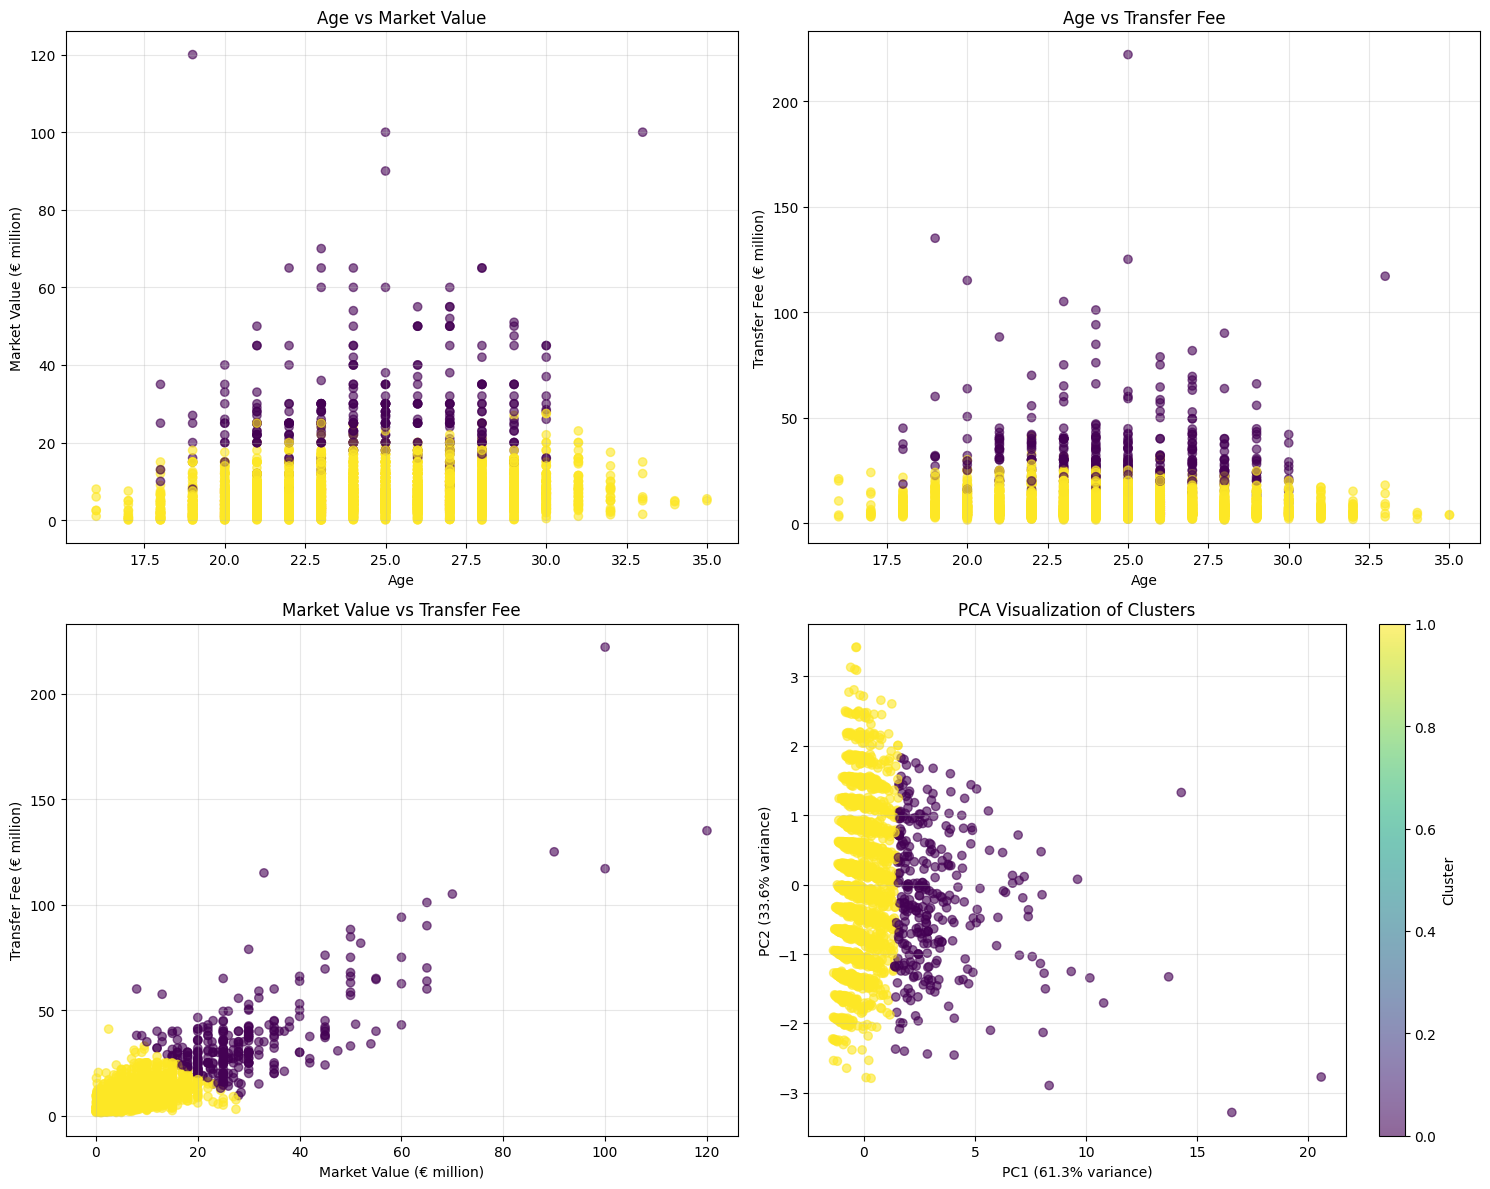

Cluster 0 (Elite): Kuning/Hijau Terang
Cluster 1 (Regular): Ungu/Biru Gelap


In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualisasi clustering results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Age vs Market Value
scatter1 = axes[0,0].scatter(clean_data_copy['Age'], clean_data_copy['Market_value']/1000000,
                           c=clean_data_copy['Cluster'], cmap='viridis', alpha=0.6)
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Market Value (€ million)')
axes[0,0].set_title('Age vs Market Value')
axes[0,0].grid(True, alpha=0.3)

# 2. Age vs Transfer Fee
scatter2 = axes[0,1].scatter(clean_data_copy['Age'], clean_data_copy['Transfer_fee']/1000000,
                           c=clean_data_copy['Cluster'], cmap='viridis', alpha=0.6)
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Transfer Fee (€ million)')
axes[0,1].set_title('Age vs Transfer Fee')
axes[0,1].grid(True, alpha=0.3)

# 3. Market Value vs Transfer Fee
scatter3 = axes[1,0].scatter(clean_data_copy['Market_value']/1000000, clean_data_copy['Transfer_fee']/1000000,
                           c=clean_data_copy['Cluster'], cmap='viridis', alpha=0.6)
axes[1,0].set_xlabel('Market Value (€ million)')
axes[1,0].set_ylabel('Transfer Fee (€ million)')
axes[1,0].set_title('Market Value vs Transfer Fee')
axes[1,0].grid(True, alpha=0.3)

# 4. PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
scatter4 = axes[1,1].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
axes[1,1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[1,1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[1,1].set_title('PCA Visualization of Clusters')
axes[1,1].grid(True, alpha=0.3)

# Add colorbar
plt.colorbar(scatter4, ax=axes[1,1], label='Cluster')

plt.tight_layout()
plt.show()

print("Cluster 0 (Elite): Kuning/Hijau Terang")
print("Cluster 1 (Regular): Ungu/Biru Gelap")

In [21]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Significance test menggunakan permutation
def permutation_test_clustering(X, true_labels, n_permutations=1000):
    # Hitung silhouette score untuk clustering asli
    true_score = silhouette_score(X, true_labels)

    # Hitung silhouette score untuk random permutations
    random_scores = []

    print(f"Silhouette score clustering asli: {true_score:.4f}")
    print("Melakukan permutation test...")

    for i in range(n_permutations):
        # Shuffle labels secara random
        random_labels = np.random.permutation(true_labels)
        random_score = silhouette_score(X, random_labels)
        random_scores.append(random_score)

        if (i + 1) % 200 == 0:
            print(f"Permutation {i + 1}/{n_permutations} selesai")

    # Hitung p-value
    p_value = np.mean(np.array(random_scores) >= true_score)

    print(f"\nHasil Significance Test:")
    print(f"Rata-rata silhouette score random: {np.mean(random_scores):.4f}")
    print(f"Standar deviasi random scores: {np.std(random_scores):.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Hasil clustering SIGNIFIKAN secara statistik (p < 0.05)")
    else:
        print("Hasil clustering TIDAK signifikan secara statistik (p >= 0.05)")

    return true_score, random_scores, p_value

# Jalankan significance test
np.random.seed(42)
true_score, random_scores, p_value = permutation_test_clustering(X_scaled, cluster_labels, n_permutations=1000)

Silhouette score clustering asli: 0.5828
Melakukan permutation test...
Permutation 200/1000 selesai
Permutation 400/1000 selesai
Permutation 600/1000 selesai
Permutation 800/1000 selesai
Permutation 1000/1000 selesai

Hasil Significance Test:
Rata-rata silhouette score random: -0.0013
Standar deviasi random scores: 0.0276
P-value: 0.0000
Hasil clustering SIGNIFIKAN secara statistik (p < 0.05)


=== ANALISIS DISTRIBUSI POSISI PER CLUSTER ===

--- CLUSTER 0 ---
Proporsi posisi (%):
Centre-Forward: 24.7%
Central Midfield: 15.4%
Left Winger: 11.9%
Right Winger: 10.9%
Attacking Midfield: 10.6%

--- CLUSTER 1 ---
Proporsi posisi (%):
Centre-Forward: 25.1%
Centre-Back: 15.3%
Central Midfield: 10.7%
Attacking Midfield: 9.0%
Defensive Midfield: 8.4%


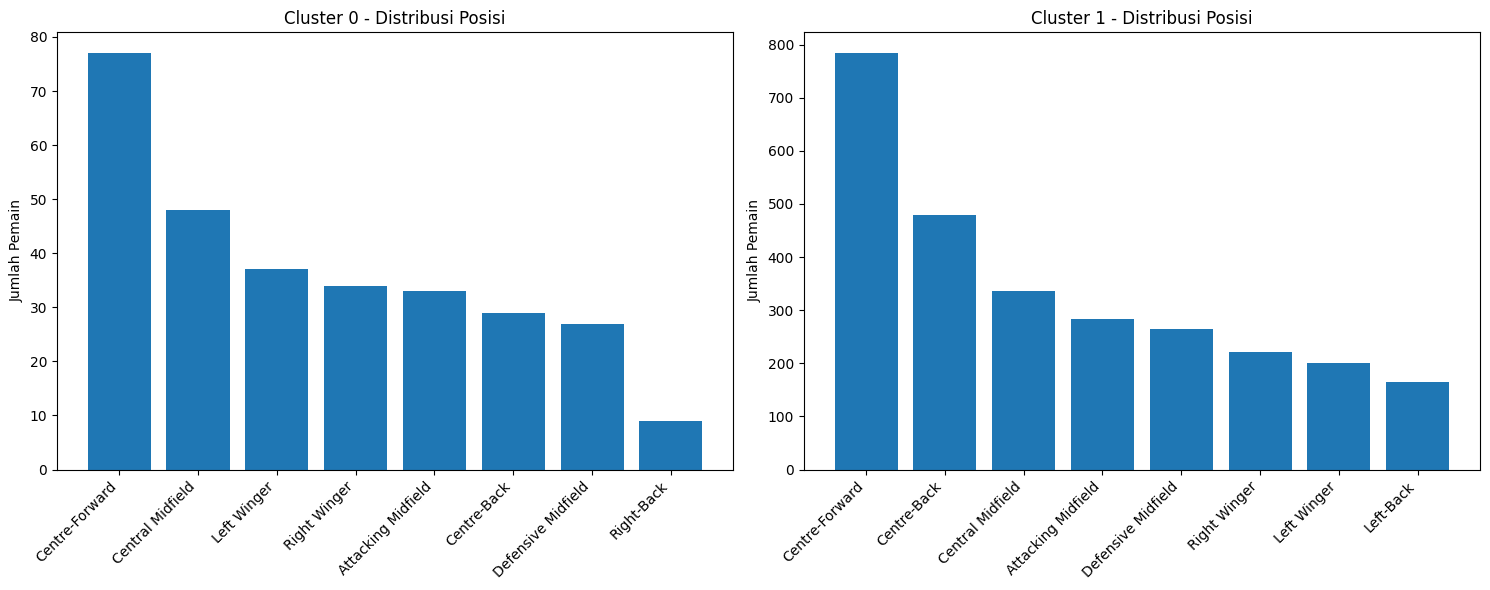


=== ANALISIS DISTRIBUSI LIGA ===
Top 5 Liga Asal per Cluster:

Cluster 0:
Premier League: 68 (21.8%)
LaLiga: 64 (20.5%)
Serie A: 46 (14.7%)
Liga NOS: 32 (10.3%)
1.Bundesliga: 32 (10.3%)

Cluster 1:
Serie A: 433 (13.8%)
Premier League: 403 (12.9%)
Ligue 1: 293 (9.4%)
LaLiga: 287 (9.2%)
1.Bundesliga: 189 (6.0%)


In [22]:
# Analisis mendalam categorical features per cluster
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ANALISIS DISTRIBUSI POSISI PER CLUSTER ===")

# Hitung proporsi posisi dalam setiap cluster
for cluster_id in range(2):
    cluster_data = clean_data_copy[clean_data_copy['Cluster'] == cluster_id]
    print(f"\n--- CLUSTER {cluster_id} ---")

    # Proporsi posisi
    position_prop = cluster_data['Position'].value_counts(normalize=True) * 100
    print("Proporsi posisi (%):")
    for pos, prop in position_prop.head(5).items():
        print(f"{pos}: {prop:.1f}%")

# Visualisasi distribusi posisi
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for cluster_id in range(2):
    cluster_data = clean_data_copy[clean_data_copy['Cluster'] == cluster_id]
    top_positions = cluster_data['Position'].value_counts().head(8)

    axes[cluster_id].bar(range(len(top_positions)), top_positions.values)
    axes[cluster_id].set_xticks(range(len(top_positions)))
    axes[cluster_id].set_xticklabels(top_positions.index, rotation=45, ha='right')
    axes[cluster_id].set_title(f'Cluster {cluster_id} - Distribusi Posisi')
    axes[cluster_id].set_ylabel('Jumlah Pemain')

plt.tight_layout()
plt.show()

print("\n=== ANALISIS DISTRIBUSI LIGA ===")

# Analisis liga asal dan tujuan
print("Top 5 Liga Asal per Cluster:")
for cluster_id in range(2):
    cluster_data = clean_data_copy[clean_data_copy['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}:")
    league_from_counts = cluster_data['League_from'].value_counts().head(5)
    for league, count in league_from_counts.items():
        percentage = (count / len(cluster_data)) * 100
        print(f"{league}: {count} ({percentage:.1f}%)")